<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
===================================================
Team Name: Quant Collective
Author/s: Sheldon Kemper, Rita, Kasia, Chiaki, Oscar, Arijit

LinkedIn Profiles:
    Sheldon Kemper: https://www.linkedin.com/in/sheldon-kemper
    Rita Bini: https://www.linkedin.com/in/rita-bini/
    Kasia Kirby: https://www.linkedin.com/in/kasia-kirby/
    Chiaki Tachikawa: https://www.linkedin.com/in/chiaki-tachikawa-56b07372/
    Oscar Bowden: https://www.linkedin.com/in/oscar-bowden-4b14711b7/
    Arijit Mitra: https://www.linkedin.com/in/arijit-mitra-09b40271/

Date: 2025-02-04
Version: 1.1

Description:
    This notebook serves as the central orchestrator of our end-to-end NLP pipeline,
    which has been developed to transform unstructured quarterly announcements and Q&A
    transcripts from Global Systemically Important Banks (G-SIBs) into actionable insights
    for the Bank of England. The processes integrated into this pipeline are:

    1. Data Collection & Preprocessing:
       - Ingestion of raw data from multiple sources (e.g., PDFs, HTML, transcripts)
       - Data cleaning, noise removal, and formatting standardization
       - Initial Exploratory Data Analysis (EDA) to understand data characteristics

    2. Methodology & Modelling:
       - Topic Modelling with BERTopic to extract latent themes and topics
       - Sentiment Analysis with FinBERT to gauge market sentiment within transcript segments
       - Summarisation Pipeline to generate concise summaries from lengthy texts

    3. Integration & Pipeline Development:
       - Sequential execution of the above processes to ensure a cohesive workflow
       - Handling of inter-process dependencies and data hand-offs
       - Iterative refinements based on challenges and model performance evaluations

    4. Results and Reporting:
       - Aggregation of model outputs, key findings, and visualisations
       - Generation of actionable insights and business recommendations for risk assessment

This collaborative effort demonstrates the combined expertise of Quant Collective in building robust,
scalable data engineering solutions tailored for complex financial datasets.

===================================================
"""

"\n===================================================\nTeam Name: Quant Collective\nAuthor/s: Sheldon Kemper, Rita, Kasia, Chiaki, Oscar, Arijit\n\nLinkedIn Profiles:\n    Sheldon: https://www.linkedin.com/in/sheldon-kemper\n    Rita: [Insert Rita's LinkedIn URL]\n    Kasia: [Insert Kasia's LinkedIn URL]\n    Chiaki: [Insert Chiaki's LinkedIn URL]\n    Oscar: [Insert Oscar's LinkedIn URL]\n    Arijit: [Insert Arijit's LinkedIn URL]\n\nDate: 2025-02-04\nVersion: 1.1\n\nDescription:\n    This notebook serves as the central orchestrator of our end-to-end NLP pipeline,\n    which has been developed to transform unstructured quarterly announcements and Q&A\n    transcripts from Global Systemically Important Banks (G-SIBs) into actionable insights\n    for the Bank of England. The processes integrated into this pipeline are:\n\n    1. Data Collection & Preprocessing:\n       - Ingestion of raw data from multiple sources (e.g., PDFs, HTML, transcripts)\n       - Data cleaning, noise removal,

In [ ]:
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/import/sk_import_PDF.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/cleansed/sk_processed_ubs.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/cleansed/sk_processed_jpmorgan.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/cleansed/kk_eda_V2.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/modelling/kk_mvp_modelling_V2.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/modelling/ob_flan_t5_sentiment_jpm.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/modelling/rb_jomorgan_summarisation_v4.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/modelling/ob_flan_t5_sentiment_jpm.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/processed/ct_preprocessing_ubs.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/processed/ct_preprocessing_jpmorgan.ipynb


In [ ]:
import os
from google.colab import drive
# Mount Google Drive to the root location with force_remount
drive.mount('/content/drive', force_remount=True)

# Assuming 'BOE' folder is in 'MyDrive' and already shared
BOE_path = '/content/drive/MyDrive/BOE/bank_of_england/data'

# Now you (and others with access) can work with files in this directory
# For example, you can list the contents:
print(os.listdir(BOE_path))

Mounted at /content/drive
['jpm_presentation_final.csv', 'cleansed', 'preprocessed_data', 'raw', 'model_outputs']


# 1. Data Collection & Preprocessing

## 1.1 Ingestion of raw data from multiple sources

In [ ]:
sk_bank_17 = "ubs"
%run sk_import_PDF.ipynb

Mounted at /content/drive
The value of my_variable is: ubs

Summary of Downloads:
('https://www.ubs.com/global/en/investor-relations/financial-information/quarterly-reporting/qr-shared/2023/3q23/_jcr_content/mainpar/toplevelgrid_copy_co/col1/linklistreimagined_c/link_1665858674.1136236242.file/PS9jb250ZW50L2RhbS9hc3NldHMvY2MvaW52ZXN0b3ItcmVsYXRpb25zL3F1YXJ0ZXJsaWVzLzIwMjMvM3EyMy8zcTIzLWVhcm5pbmdzLWNhbGwtcmVtYXJrcy5wZGY%3D/3q23-earnings-call-remarks.pdf', 'exists', '/content/drive/MyDrive/BOE/bank_of_england/data/raw/ubs/3q23-earnings-call-remarks.pdf')
('https://www.ubs.com/global/en/investor-relations/financial-information/quarterly-reporting/qr-shared/2023/2q23/_jcr_content/mainpar/toplevelgrid_copy_co/col1/linklistreimagined_c/link_2038370922_copy.1634234040.file/PS9jb250ZW50L2RhbS9hc3NldHMvY2MvaW52ZXN0b3ItcmVsYXRpb25zL3F1YXJ0ZXJsaWVzLzIwMjMvMnEyMy8ycTIzLWVhcm5pbmdzLWNhbGwtcmVtYXJrcy5wZGY=/2q23-earnings-call-remarks.pdf', 'exists', '/content/drive/MyDrive/BOE/bank_of_england/data/ra

In [ ]:
sk_bank_17 = "jpmorgan"
%run sk_import_PDF.ipynb

Mounted at /content/drive
The value of my_variable is: jpmorgan

Summary of Downloads:
('https://www.jpmorganchase.com/content/dam/jpmc/jpmorgan-chase-and-co/investor-relations/documents/quarterly-earnings/2024/2nd-quarter/jpm-2q24-earnings-call-transcript-final.pdf', 'exists', '/content/drive/MyDrive/BOE/bank_of_england/data/raw/jpmorgan/jpm-2q24-earnings-call-transcript-final.pdf')
('https://www.jpmorganchase.com/content/dam/jpmc/jpmorgan-chase-and-co/investor-relations/documents/quarterly-earnings/2023/2nd-quarter/2q23-earnings-transcript.pdf', 'exists', '/content/drive/MyDrive/BOE/bank_of_england/data/raw/jpmorgan/2q23-earnings-transcript.pdf')
('https://www.jpmorganchase.com/content/dam/jpmc/jpmorgan-chase-and-co/investor-relations/documents/quarterly-earnings/2023/1st-quarter/1q23-earnings-transcript.pdf', 'exists', '/content/drive/MyDrive/BOE/bank_of_england/data/raw/jpmorgan/1q23-earnings-transcript.pdf')
('https://www.jpmorganchase.com/content/dam/jpmc/jpmorgan-chase-and-co/in

## 1.2 Data cleaning

### Initial Data cleaning

In [ ]:
# JP MOrgan to be provided by Arijit
# %run

Exception: you must provide at least a filename.

<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/cleansed/sk_processed_ubs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# UBS
%run sk_processed_ubs.ipynb

Mounted at /content/drive
Processing file: 1q23-earnings-call-remarks.pdf
Processing file: 1q24-earnings-call-remarks.pdf
Processing file: 2q23-earnings-call-remarks.pdf
Processing file: 2q24-earnings-call-remarks.pdf
Processing file: 3q23-earnings-call-remarks.pdf
Processing file: 3q24-earnings-call-remarks.pdf
Processing file: 4q23-earnings-call-remarks.pdf
Processing file: 4q24-earnings-call-remarks.pdf
Management announcements saved to: /content/drive/MyDrive/BOE/bank_of_england/data/cleansed/ubs_management_discussion.csv
Q&A section saved to: /content/drive/MyDrive/BOE/bank_of_england/data/cleansed/ubs_qna_section.csv


## 1.3 Preprocessing

<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/processed/ct_preprocessing_jpmorgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# JPM
%run ct_preprocessing_jpmorgan.ipynb

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


NameError: name 'qa_data' is not defined

NameError: name 'qa_data' is not defined

<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/processed/ct_preprocessing_ubs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# UBS
%run ct_preprocessing_ubs.ipynb

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NameError: name 'qa_data' is not defined

NameError: name 'qa_data' is not defined

## 1.4 Initial Exploratory Data Analysis

<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/cleansed/kk_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
['archived', 'ubs_qa_df_preprocessed_ver2.csv', 'ubs_management_discussion.csv', 'jpmorgan_management_discussion.csv', 'jp_morgan_qna.csv', 'JPMorgan_QNA_processed_data_V2.0.xlsx']

 **File: jp_morgan_qna.csv (JP Morgan Q&A)**
['Quarter', 'Question', 'Question_cleaned', 'Analyst', 'Analyst Role', 'Response', 'Response_cleaned', 'Executive', 'Executive Role Type']

 **File: jpmorgan_management_discussion.csv (JP Morgan Management)**
['Quarter', 'Utterance', 'Utterance_cleaned']

 **File: ubs_qa_df_preprocessed_ver2.csv (UBS Q&A)**
['filename', 'Quarter', 'Question', 'Question_cleaned', 'Analyst_Bank', 'Response', 'Response_cleaned', 'Executive']

 **File: ubs_management_discussion.csv (UBS Management)**
['Quarter', 'Speaker', 'Utterance', 'Utterance_cleaned']
 Missing Values in JP Morgan Q&A Data:
 Quarter                 0
Question                0
Question_cleaned        0
Analyst                 0
Analyst Role            0
Response               13
Response_

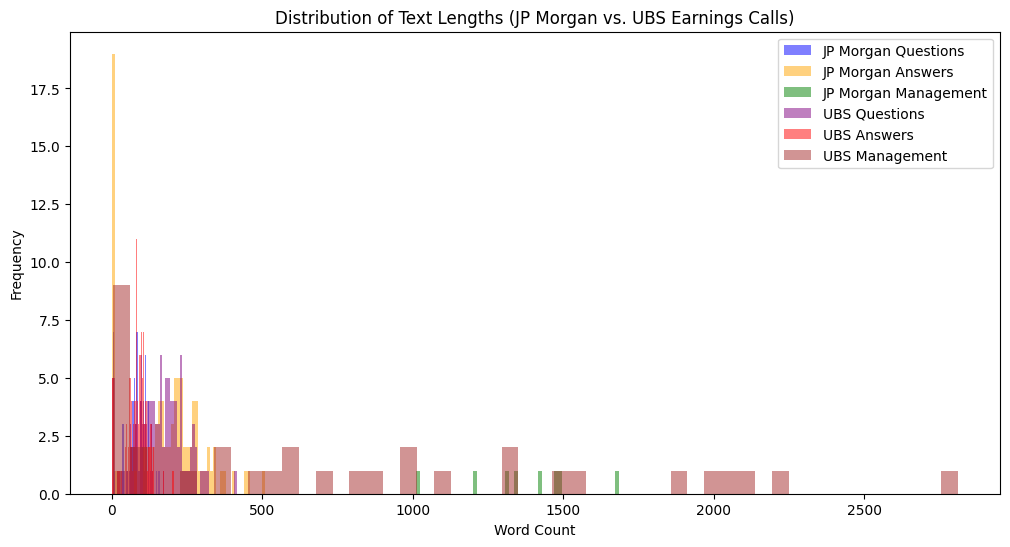


 Summary Statistics:

 JP Morgan Q&A Questions:
 count     91.000000
mean      82.516484
std       36.778727
min        2.000000
25%       68.000000
50%       85.000000
75%      105.000000
max      174.000000
Name: question_word_count, dtype: float64

 JP Morgan Q&A Answers:
 count     91.000000
mean     179.538462
std      122.846725
min        1.000000
25%      108.000000
50%      195.000000
75%      259.500000
max      510.000000
Name: answer_word_count, dtype: float64

 JP Morgan Management Discussion:
 count       8.000000
mean     1367.125000
std       202.749978
min      1011.000000
25%      1282.500000
50%      1378.500000
75%      1481.750000
max      1684.000000
Name: text_word_count, dtype: float64

 UBS Q&A Questions:
 count     96.000000
mean     164.322917
std       79.344352
min        1.000000
25%      114.000000
50%      165.500000
75%      209.500000
max      415.000000
Name: question_word_count, dtype: float64

 UBS Q&A Answers:
 count     96.000000
mean      84.937

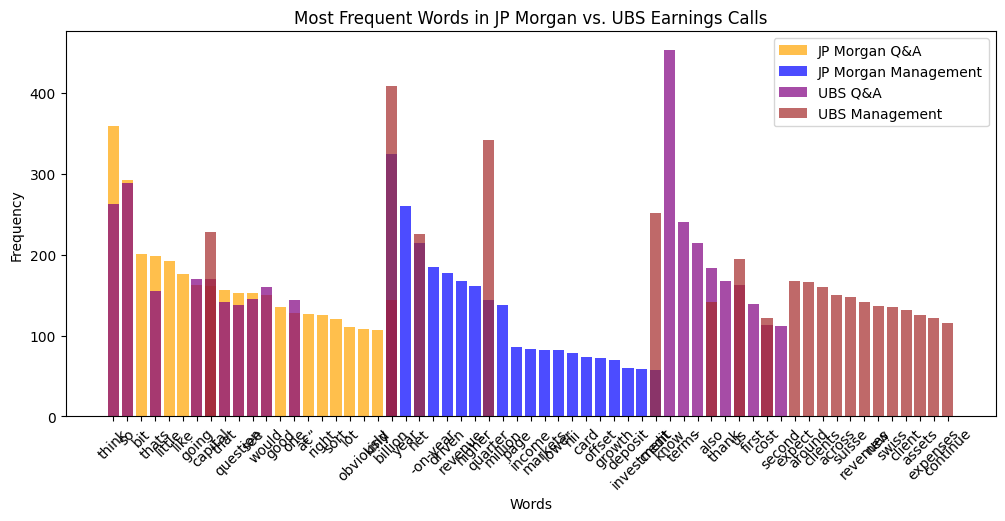

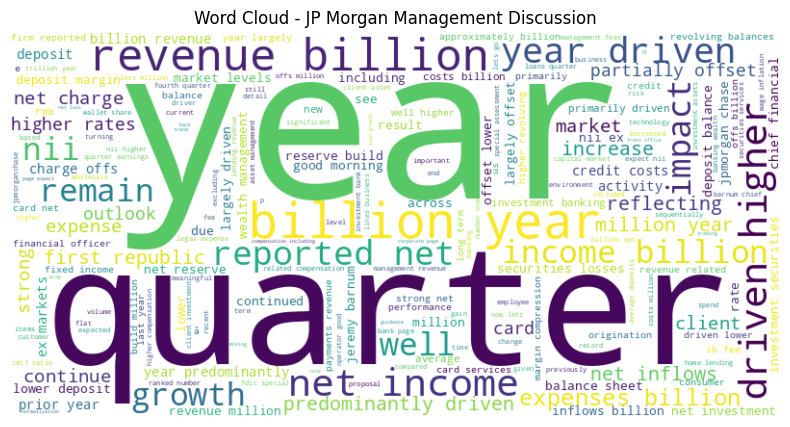

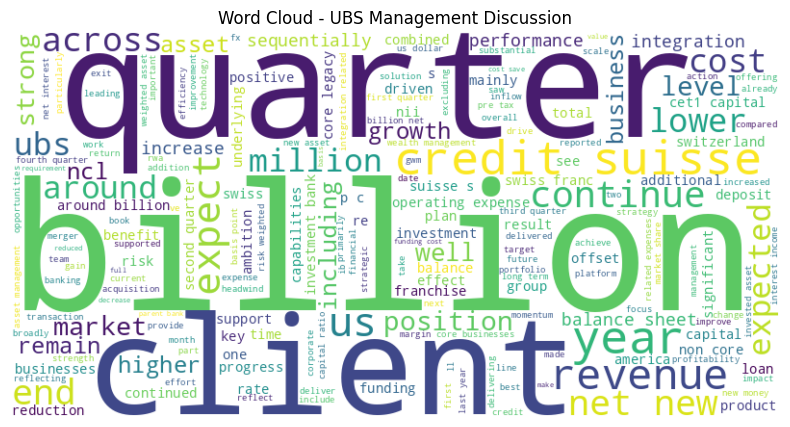

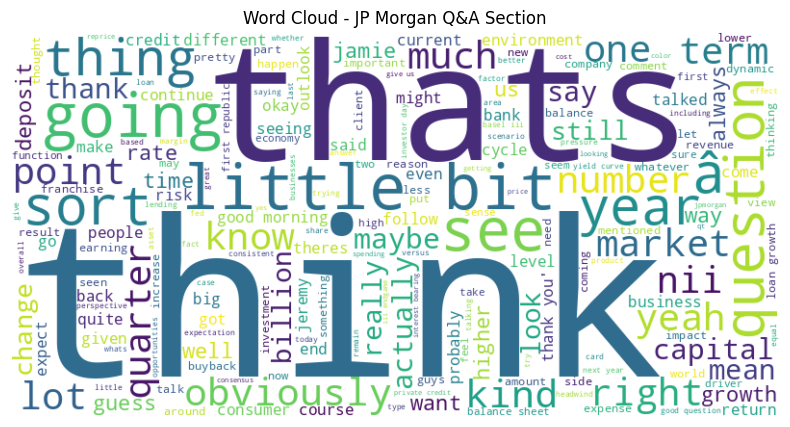

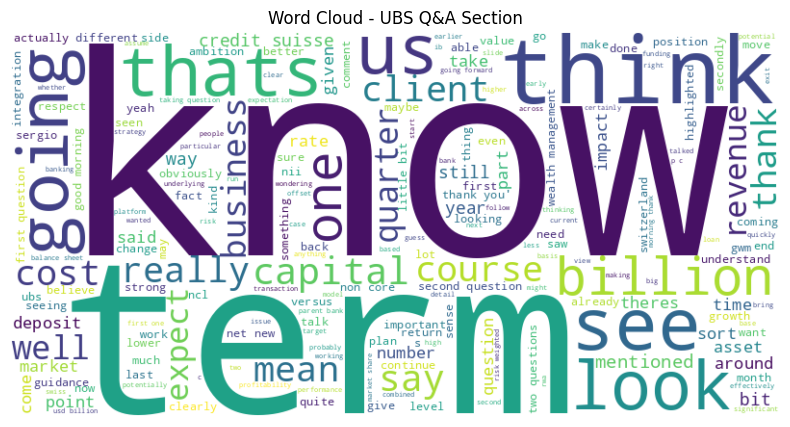


Top Bigrams in JP Morgan Q&A:
 [(('little', 'bit'), 166), (('good', 'morning'), 43), (('thank', "you']"), 42), (('so', 'think'), 31), (('loan', 'growth'), 29), (('first', 'republic'), 27), (('basel', 'iii'), 26), (('investor', 'day'), 25), (('yield', 'curve'), 25), (('good', 'question'), 24), (('balance', 'sheet'), 23), (('got', 'it'), 23), (('private', 'credit'), 22), (('give', 'us'), 22), (('else', 'equal'), 22)]

Top Bigrams in JP Morgan Management Discussion:
 [(('year', '-on-year'), 185), (('net', 'income'), 61), (('driven', 'higher'), 60), (('reported', 'net'), 46), (('-on-year', 'driven'), 42), (('predominantly', 'driven'), 37), (('net', 'inflows'), 37), (('first', 'republic'), 37), (('partially', 'offset'), 32), (('higher', 'rates'), 31), (('net', 'charge'), 30), (('billion', 'revenue'), 28), (('credit', 'costs'), 27), (('ex', 'markets'), 26), (('quarter', '-on-quarter'), 25)]

Top Trigrams in JP Morgan Q&A:
 [(('basel', 'iii', 'endgame'), 21), (("['hi", 'good', 'morning'), 18

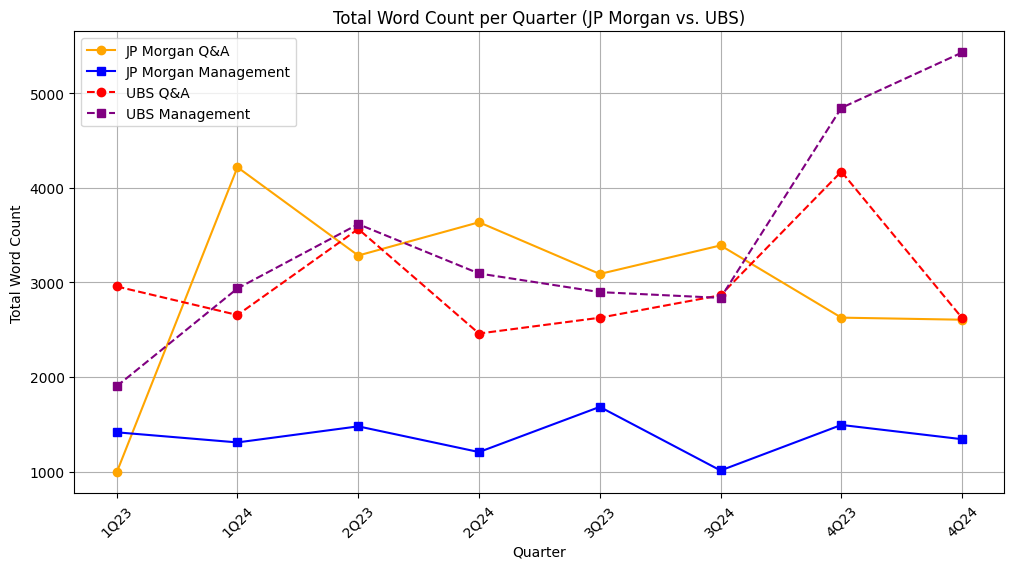

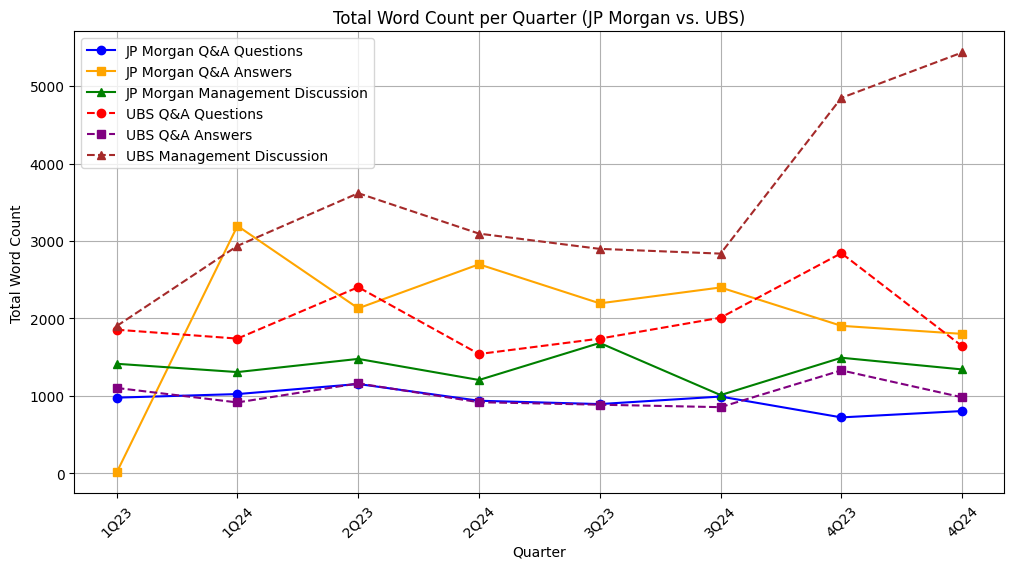

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


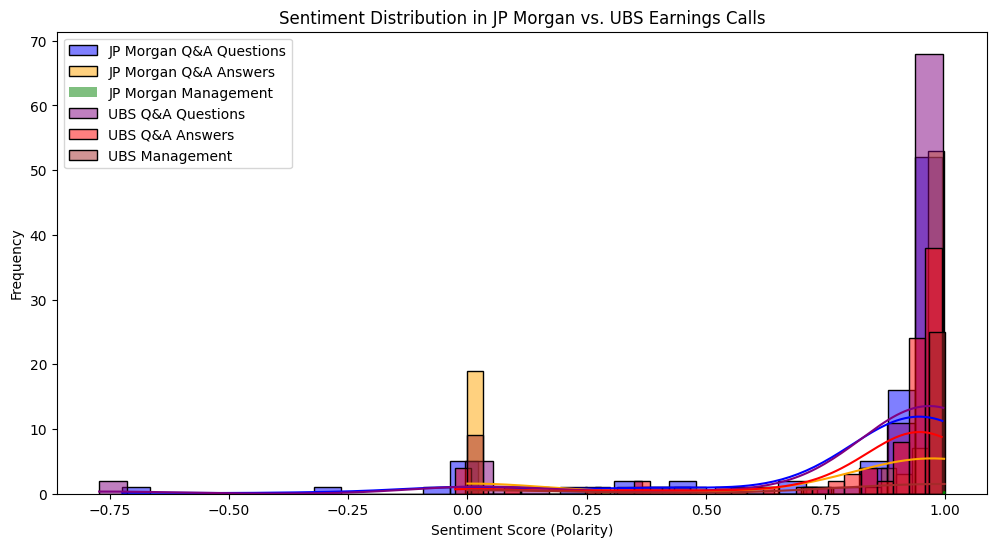

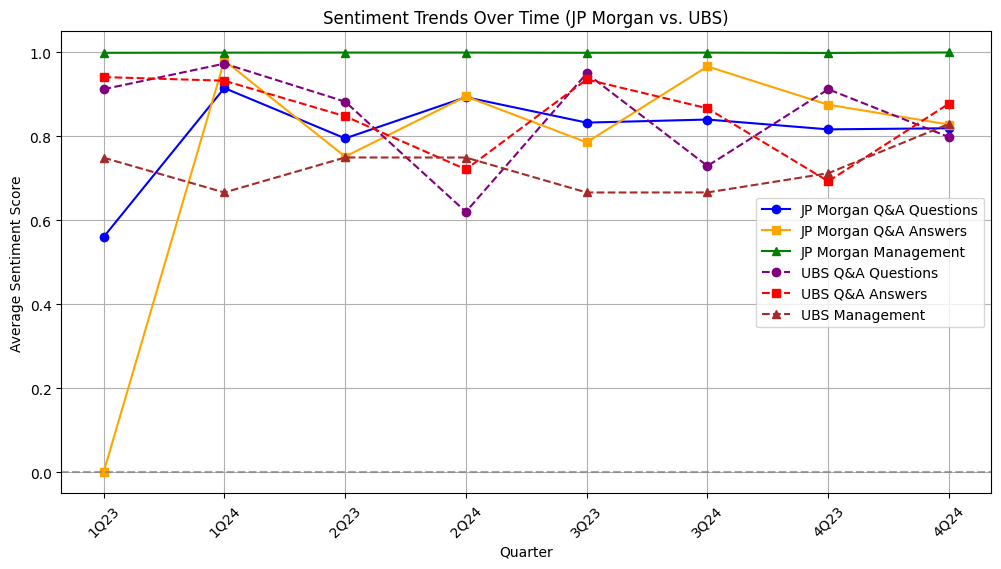


Sentiment Summary Statistics (JP Morgan):
Q&A Questions: count    91.000000
mean      0.805635
std       0.339251
min      -0.723400
25%       0.883250
50%       0.950000
75%       0.973800
max       0.995300
Name: question_sentiment, dtype: float64
Q&A Answers: count    91.000000
mean      0.748988
std       0.401932
min       0.000000
25%       0.794600
50%       0.976400
75%       0.992250
max       0.998900
Name: answer_sentiment, dtype: float64
Management Discussion: count    8.000000
mean     0.999125
std      0.000365
min      0.998500
25%      0.998875
50%      0.999200
75%      0.999400
max      0.999600
Name: text_sentiment, dtype: float64

Sentiment Summary Statistics (UBS):
Q&A Questions: count    96.000000
mean      0.844891
std       0.348417
min      -0.771700
25%       0.926300
50%       0.977750
75%       0.990050
max       0.997100
Name: question_sentiment, dtype: float64
Q&A Answers: count    96.000000
mean      0.840080
std       0.260181
min      -0.025800
25%    

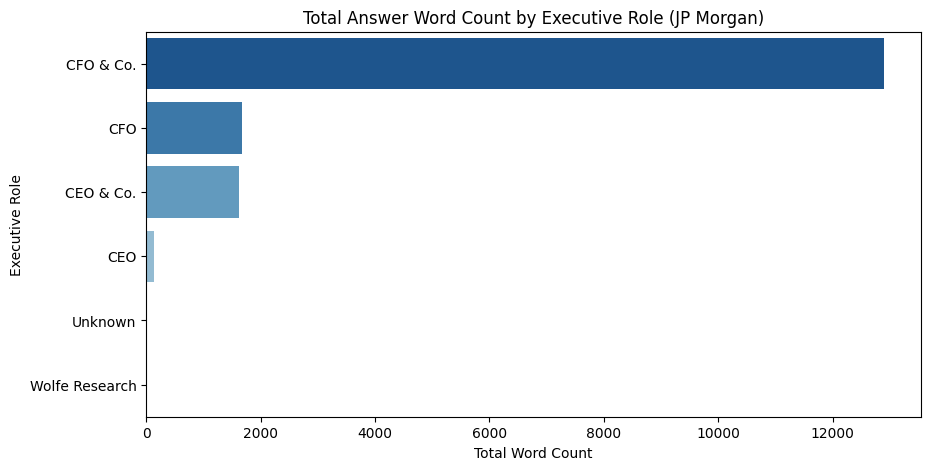

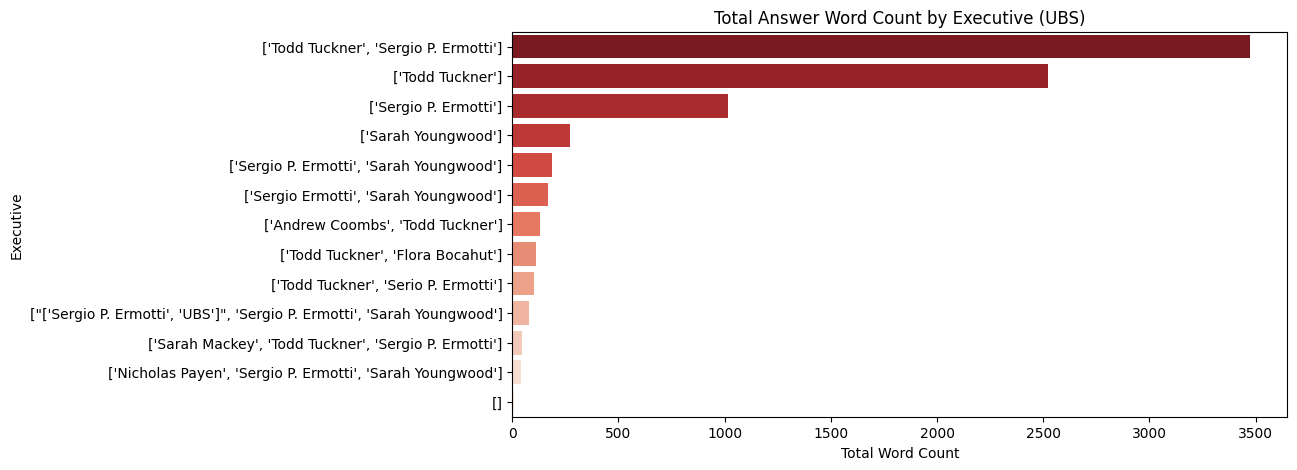

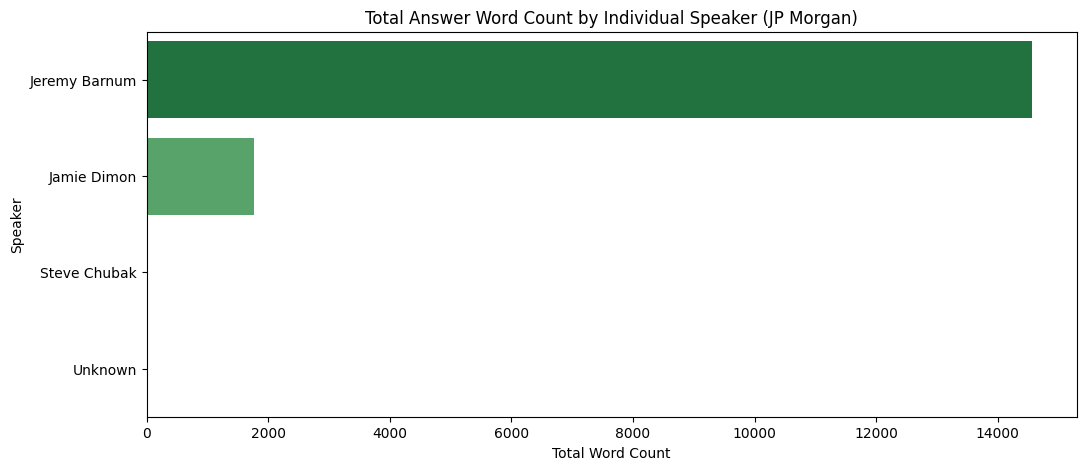

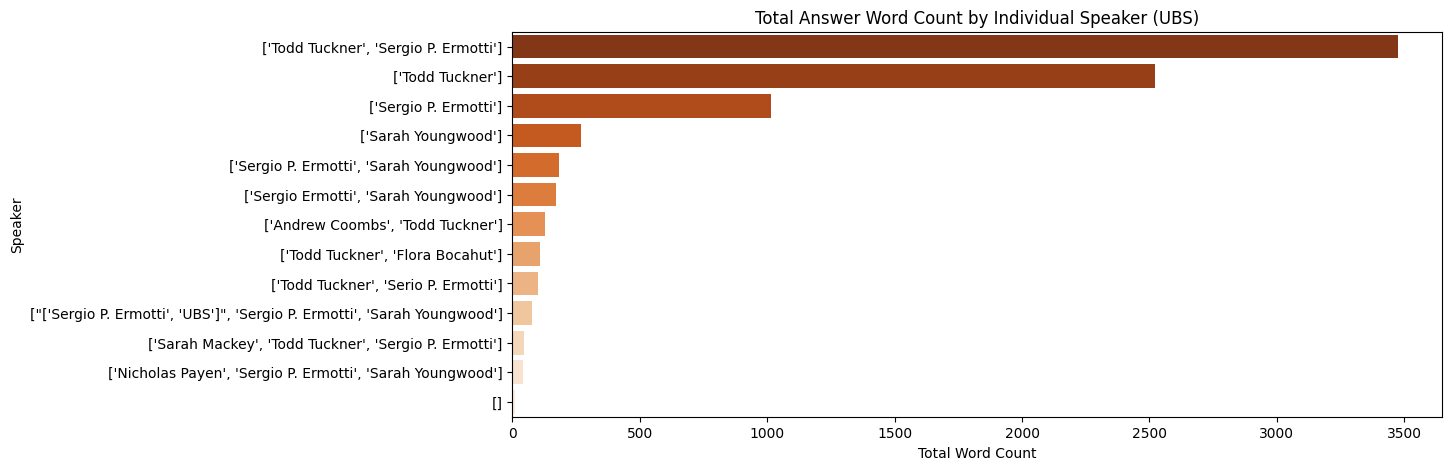

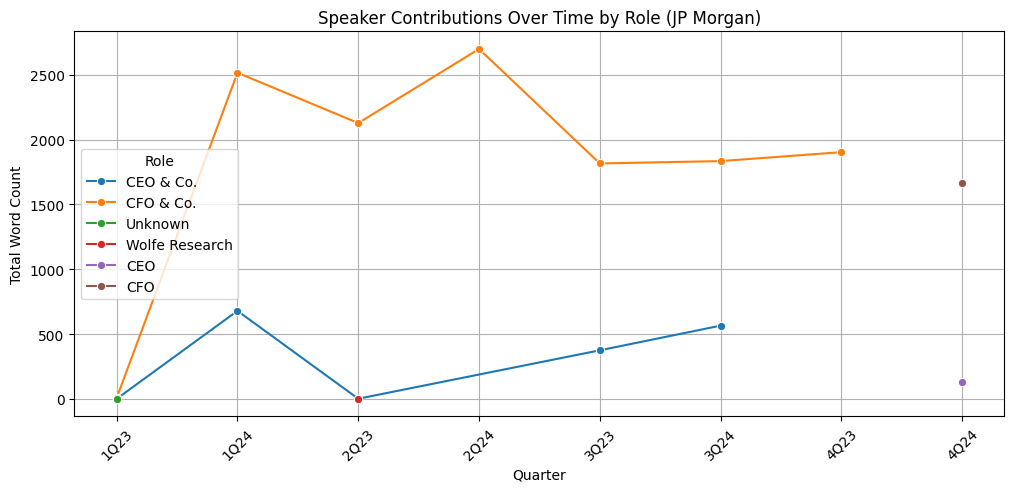

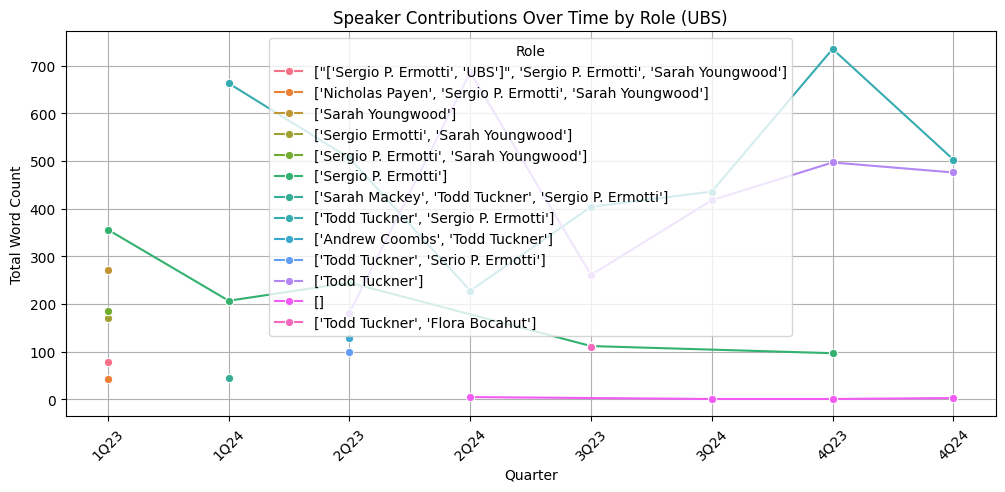

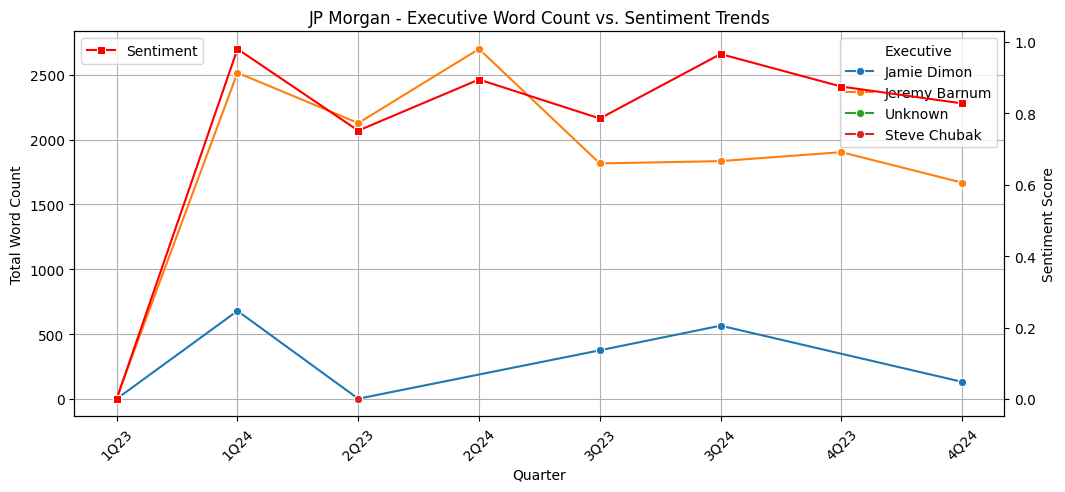

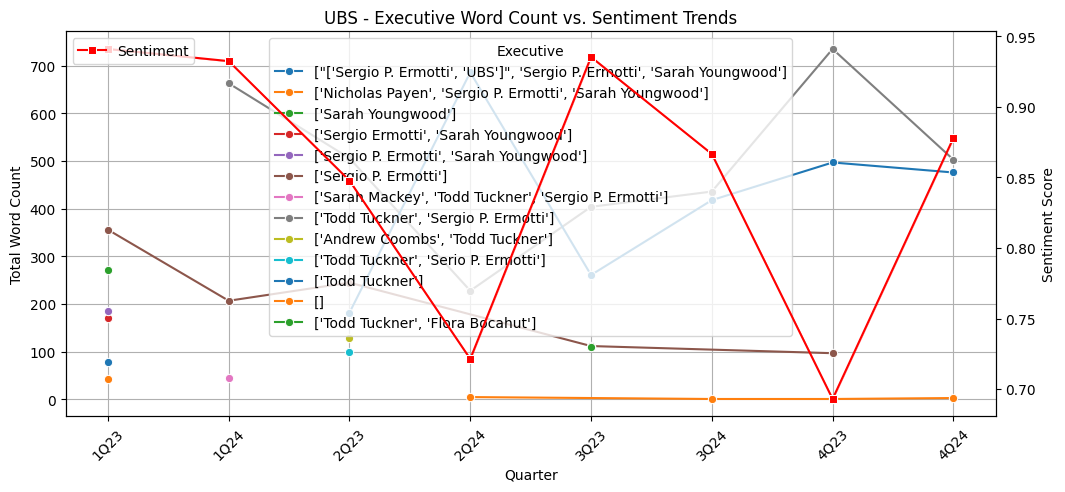

In [ ]:
%run kk_eda_V2.ipynb

# 2. Methodology & Modelling

## 2.1 Topic Modelling

### Topic Modelling with GPT-4

### Topic Modelling with BERTopic

<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/modelling/kk_mvp_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
 JP Morgan Q&A DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Quarter              91 non-null     object
 1   Question             91 non-null     object
 2   Question_cleaned     91 non-null     object
 3   Analyst              91 non-null     object
 4   Analyst Role         91 non-null     object
 5   Response             78 non-null     object
 6   Response_cleaned     91 non-null     object
 7   Executive            88 non-null     object
 8   Executive Role Type  88 non-null     object
dtypes: object(9)
memory usage: 6.5+ KB
None


Quarter                                           Question  \
0    4Q24  Hi. Good morning. Jeremy, I wanted to ask abou...   
1    4Q24  Hi. Simple and then more difficult, I guess. J...   
2    4Q24  Hey. Good morning. Maybe just on regulation, w...   
3    4Q24  Yes. Hi, good morning. Wanted to follow up on ...   
4    4Q24           Does that conclude your question, Erika?   

                                    Question_cleaned         Analyst  \
0  ['hi good morning jeremy wanted ask capital kn...   John McDonald   
1  ['hi simple difficult guess jamie whos success...       Mike Mayo   
2  ['hey good morning maybe regulation new admini...    Jim Mitchell   
3  ['yes hi good morning wanted follow questions ...  Erika Najarian   
4                        ['conclude question erika']           Erika   

                             Analyst Role  \
0        Analyst, Truist Securities, Inc.   
1     Analyst, Wells Fargo Securities LLC   
2  Analyst, Seaport Global Securities LLC   
3             Analyst, UBS Securities LLC   
4                                 Unknown   

                                            Response  \
0  Yeah. Good question, John, and welcome back, b...   
1  I do love what I do. And answering the second ...   
2  Hey, Jim. I mean, it's obviously something we'...   
3  Right, Erika. Okay. You are tempting me with m...   
4  Very good. We can go to the next question. Tha...   

                                    Response_cleaned      Executive  \
0  ['yeah good question john welcome back way so ...  Jeremy Barnum   
1  ['love do answering second question first look...    Jamie Dimon   
2  ['hey jim mean obviously something thinking lo...  Jeremy Barnum   
3  ['right erika okay tempting many rabbit holes ...  Jeremy Barnum   
4              ['good go next question thanks yeah']  Jeremy Barnum   

  Executive Role Type  
0                 CFO  
1                 CEO  
2                 CFO  
3                 CFO  
4                 CFO


 UBS Q&A DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   filename          96 non-null     object
 1   Quarter           96 non-null     object
 2   Question          94 non-null     object
 3   Question_cleaned  96 non-null     object
 4   Analyst_Bank      96 non-null     object
 5   Response          91 non-null     object
 6   Response_cleaned  96 non-null     object
 7   Executive         96 non-null     object
dtypes: object(8)
memory usage: 6.1+ KB
None


filename Quarter  \
0  1q23-earnings-call-remarks.pdf    1Q23   
1  1q23-earnings-call-remarks.pdf    1Q23   
2  1q23-earnings-call-remarks.pdf    1Q23   
3  1q23-earnings-call-remarks.pdf    1Q23   
4  1q23-earnings-call-remarks.pdf    1Q23   

                                            Question  \
0  Chis Hallam, Goldman Sachs Yes. Good morning, ...   
1  Yeah. Thanks. Just two questions. The first on...   
2  Yeah. Thank you. Good morning. Welcome back, S...   
3  Yes. Good morning. The first question I wanted...   
4  Good morning. Two questions. Firstly, just on ...   

                                    Question_cleaned     Analyst_Bank  \
0  ['okay thank you capital requirements know sit...          Goldman   
1  ['so sarah take first question take secondso g...         JPMorgan   
2  ['thank you ryan good back interact well look ...  Bank of America   
3  ['so first question terms trends april really ...        Jefferies   
4  ['so first quarter first question seen signifi...             Citi   

                                            Response  \
0  Okay. Thank you. On capital requirements, you ...   
1  So, Sarah, take the first question. I'll take ...   
2  Thank you, Ryan. It is good to be back to inte...   
3  So, on the first question in terms of the tren...   
4  So, on the first quarter or the first question...   

                                    Response_cleaned  \
0  ['chis hallam goldman sachs yes good morning e...   
1  ['yeah thanks two questions first one related ...   
2  ['yeah thank you good morning welcome back ser...   
3  ['yes good morning first question wanted ask r...   
4  ['good morning two questions firstly slide 10 ...   

                                  Executive  
0                     ['Sergio P. Ermotti']  
1  ['Sergio P. Ermotti', 'Sarah Youngwood']  
2                     ['Sergio P. Ermotti']  
3  ['Sergio P. Ermotti', 'Sarah Youngwood']  
4                       ['Sarah Youngwood']


 JP Morgan Management Discussion DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Quarter            8 non-null      object
 1   Utterance          8 non-null      object
 2   Utterance_cleaned  8 non-null      object
dtypes: object(3)
memory usage: 324.0+ bytes
None


Quarter                                          Utterance  \
0    4Q24  MANAGEMENT DISCUSSION SECTION \n \nOperator : ...   
1    3Q24  MANAGEMENT DISCUSSION SECTION  \n           \n...   
2    2Q24  MANAGEMENT DISCUSSION SECTION  \n           \n...   
3    1Q24  MANAGEMENT DISCUSSION SECTION  \n           \n...   
4    4Q23  MANAGEMENT DISCUSSION SECTION  \n           \n...   

                                   Utterance_cleaned  
0  ['management discussion section operator : goo...  
1  ['management discussion section operator : goo...  
2  ['management discussion section operator : goo...  
3  ['management discussion section operator : goo...  
4  ['management discussion section operator : goo...


 UBS Management Discussion DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Quarter            34 non-null     object
 1   Speaker            34 non-null     object
 2   Utterance          34 non-null     object
 3   Utterance_cleaned  34 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB
None


Quarter                        Speaker  \
0    1Q23                        Unknown   
1    1Q23              Sergio P. Ermotti   
2    1Q23                 Latin America.   
3    1Q23                Sarah Youngwood   
4    1Q24  Group Chief Financial Officer   

                                           Utterance  \
0  Youngwood, Group Chief Financial Officer Inclu...   
1  Thank you, Sarah, good morning, everyone. I am...   
2  In Asset Management, the combination will impr...   
3  Thank you, Sergio. Good morning, everyone. rel...   
4                      Including analyst Q&A session   

                                   Utterance_cleaned  
0  ['youngwood group chief financial officer incl...  
1  ['thank you sarah good morning everyone happy ...  
2  ['asset management combination improve positio...  
3  ['thank you sergio good morning everyone relat...  
4                  ['including analyst q&a session']


 Missing Response Summary (JPM Q&A):
Quarter
1Q23    12
1Q24     0
2Q23     1
2Q24     0
3Q23     0
3Q24     0
4Q23     0
4Q24     0
Name: Missing_Response_Flag, dtype: int64

Total Missing Responses in JPM: 13 out of 91

 Missing Response Summary (UBS Q&A):
Quarter
1Q23    0
1Q24    0
2Q23    0
2Q24    2
3Q23    0
3Q24    1
4Q23    1
4Q24    1
Name: Missing_Response_Flag, dtype: int64

Total Missing Responses in UBS: 5 out of 96

🔍 Checking Short Responses for JP Morgan:
   Quarter                        Response_cleaned
9     4Q24  [['thanks, much, see, next, quarter']]
30    2Q24                         [['questions']]
52    4Q23                   [['questions, time']]
64    3Q23             [['thank, you, questions']]
70    2Q23                               [['nan']]

⚠️ Total number of short responses in JP Morgan: 18

🔍 Checking Short Responses for UBS:
   Quarter            Response_cleaned
40    2Q24        [['morgan, thanks']]
43    2Q24     [['okay, thank, much']]
58    3Q2

<Figure size 1200x600 with 0 Axes>

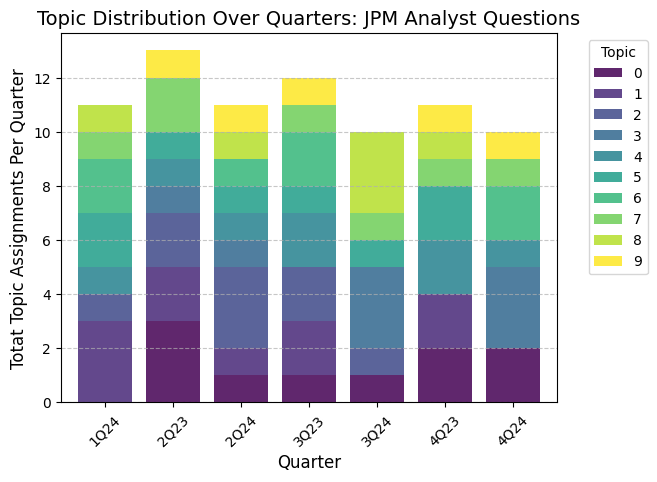

<Figure size 1200x600 with 0 Axes>

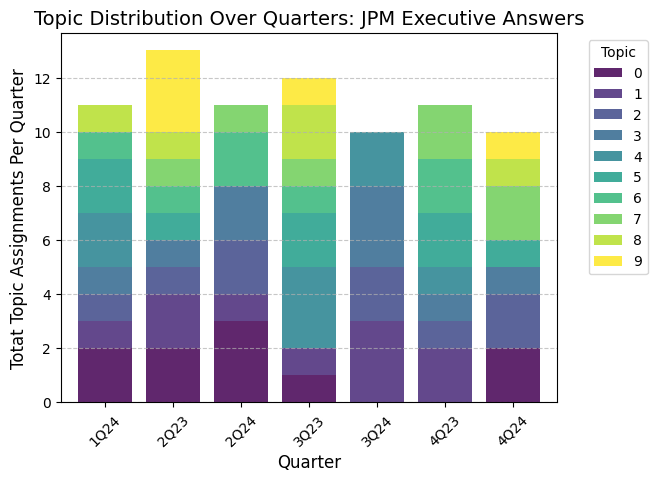

<Figure size 1200x600 with 0 Axes>

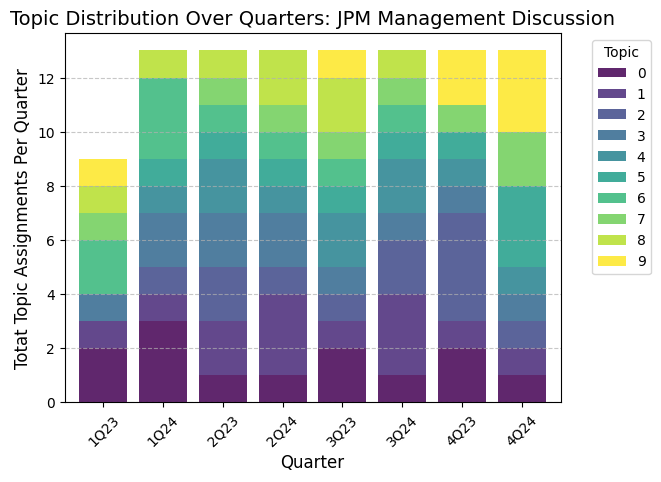


 Visualizing Topic Trends for UBS...


<Figure size 1200x600 with 0 Axes>

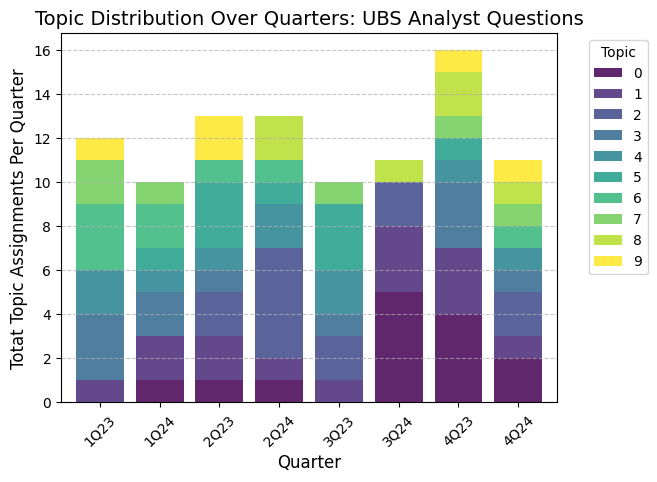

<Figure size 1200x600 with 0 Axes>

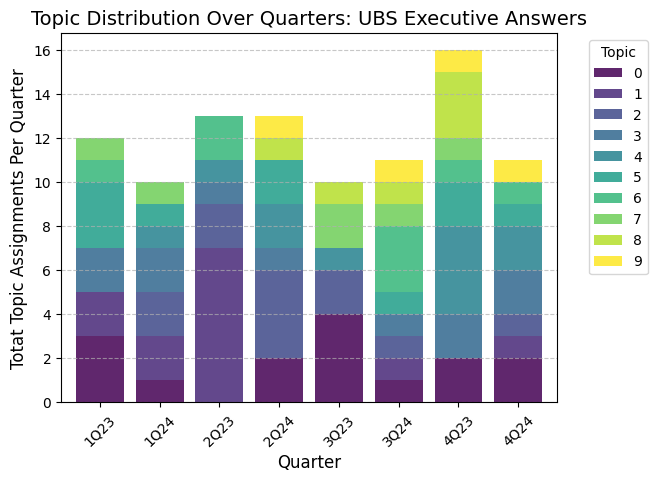

<Figure size 1200x600 with 0 Axes>

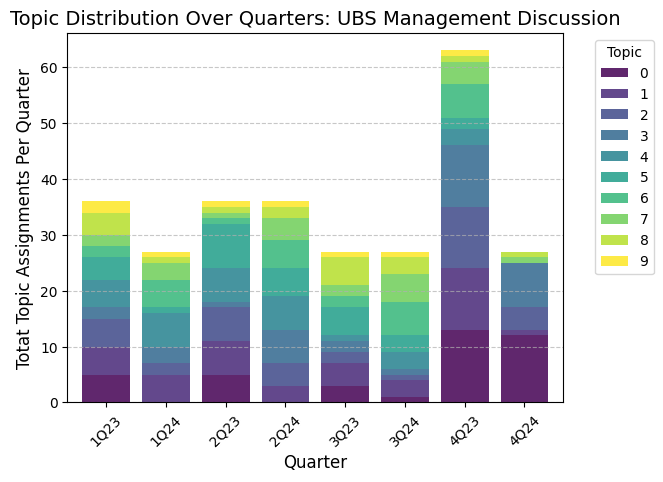


 Visualizing Topic Evolution for JPM...


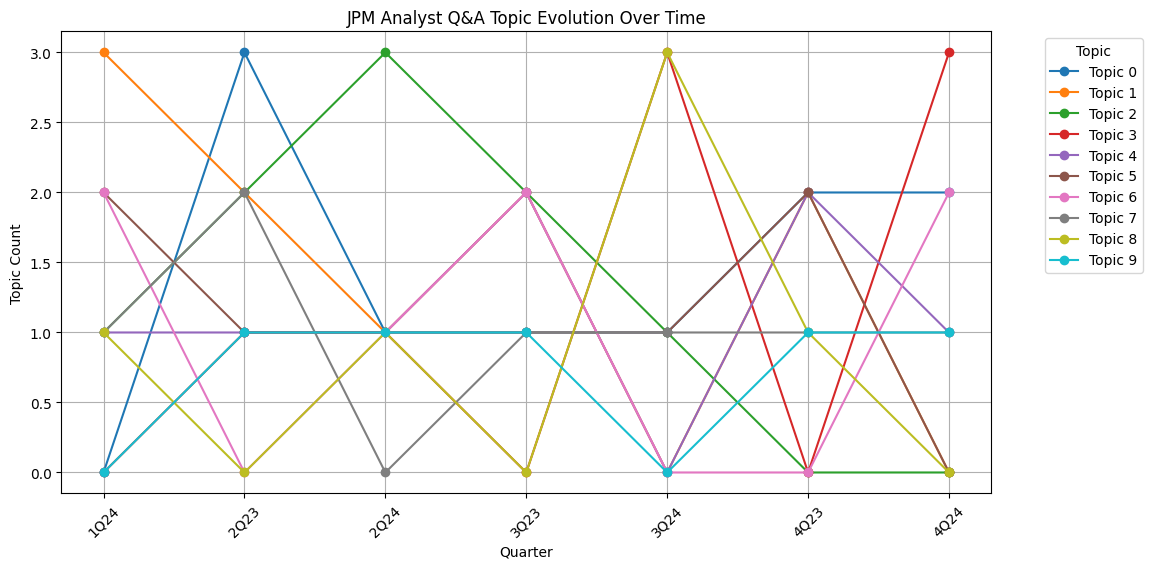

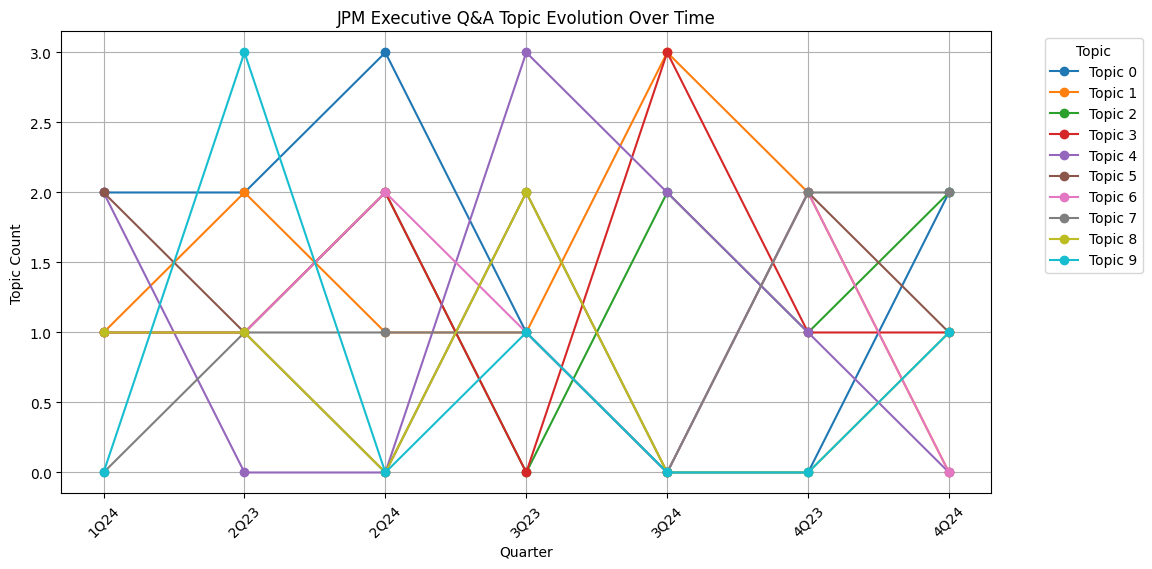

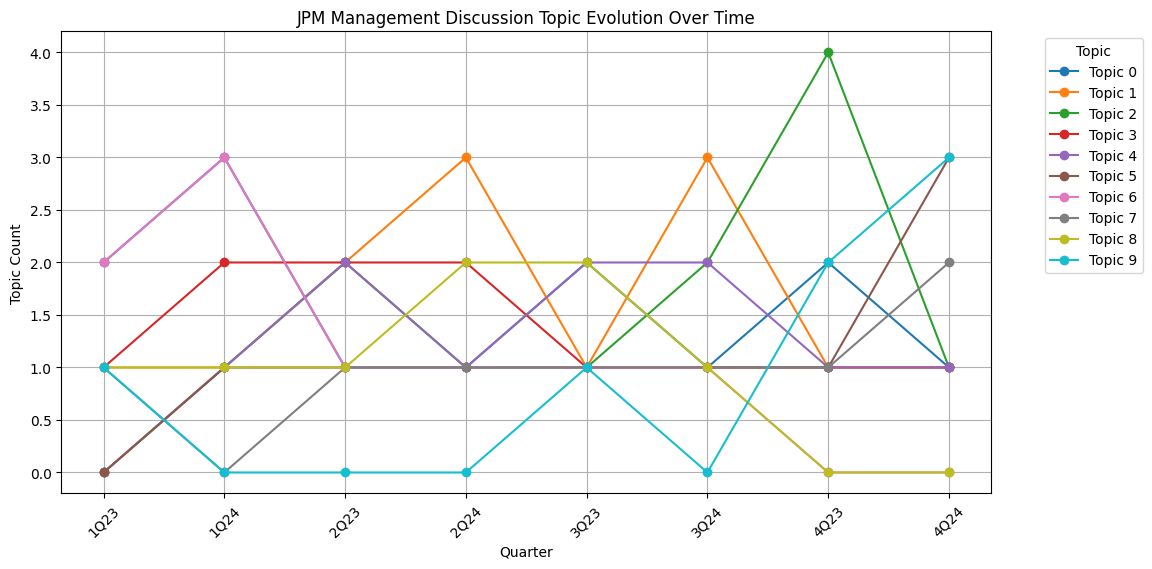


 Visualizing Topic Evolution for UBS...


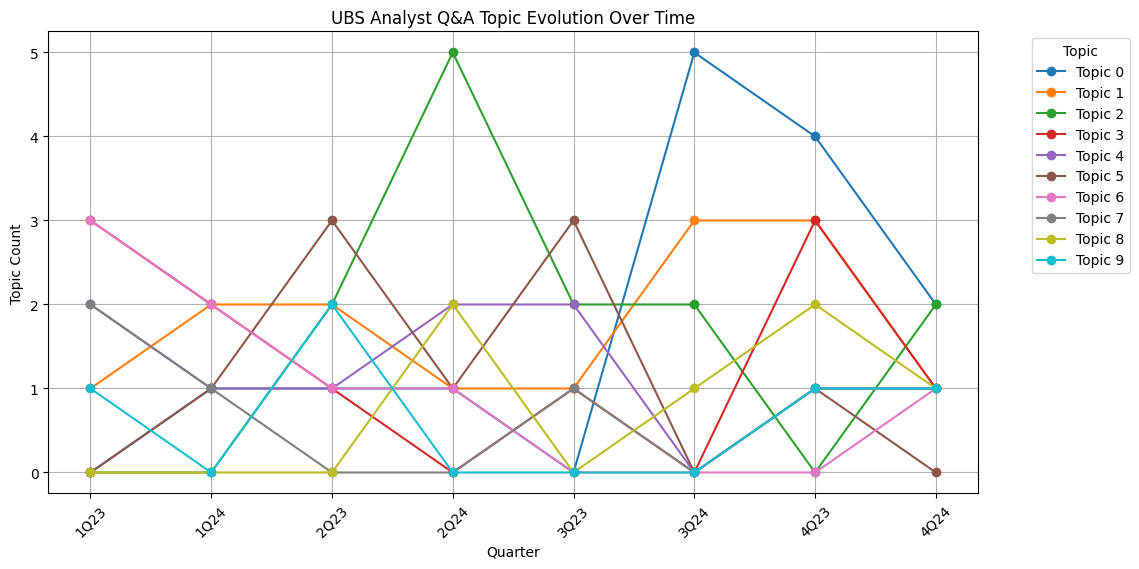

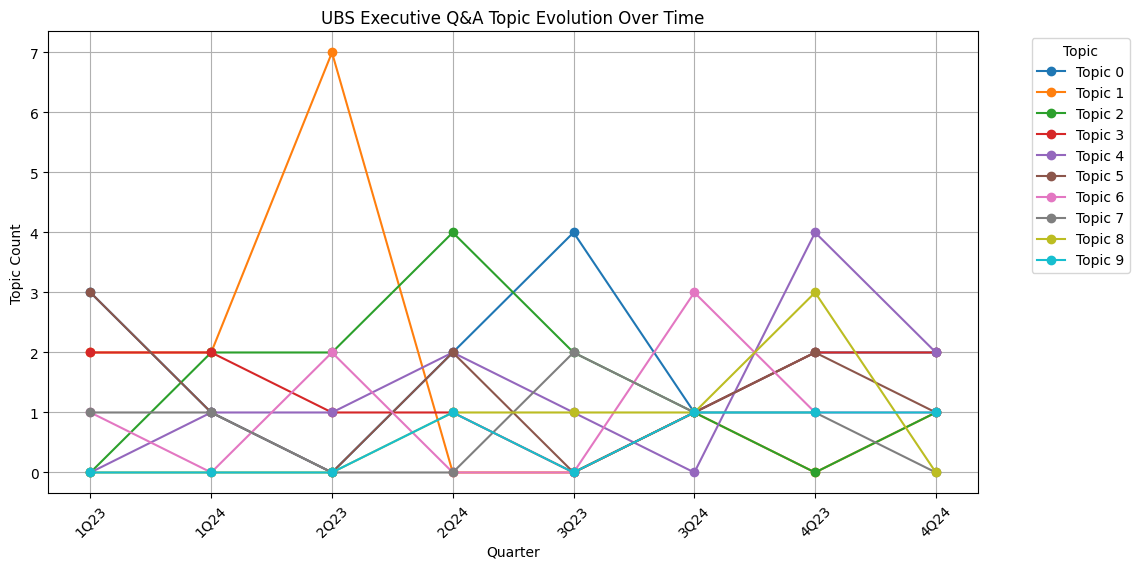

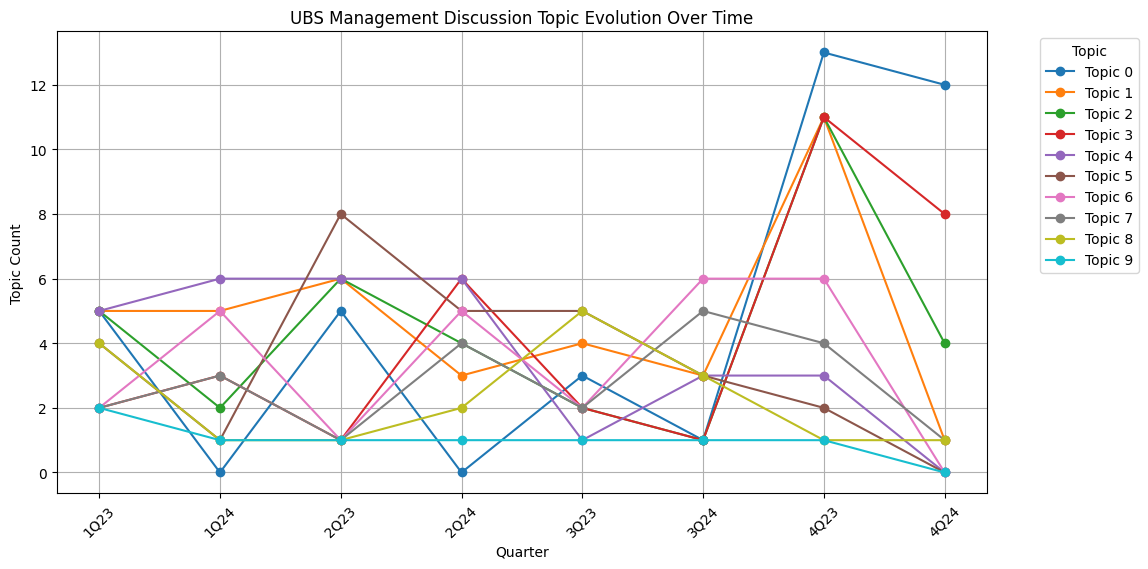

 Checking Sentiment Analysis Datasets:

 JPM Analyst Questions:
 Data Loaded - Total Entries: 78
 Sample Data: ['jeremy wanted ask capital know get question lot kind high-class dilemma growing capital base perspective earnings store guess whats framework thinking opportunity cost sitting growing base capital high might let go versus patience waiting attractive deployment opportunities you jeremy follow-up think investment spend agenda year differ from say last year last couple years across lines business kind certainty return spectrum talked about kind efficiencies baked outlook helpful you', 'simple difficult guess jamie whos successor second question is know asked question investor day stay ceo little bit longer think hearing investors now goes down think investors would stay say going stay less five years finally getting wanted years spaghetti chart regulatory structure unpredictability capital requirements regulatory costs seems finally getting playing for stay around bit longer in

Device set to use cuda:0



 Running Sentiment Analysis on JPM Analyst Questions...
 Completed: JPM Analyst Questions
 Sentiment Distribution: {'neutral': 74, 'positive': 3, 'negative': 1}

 Running Sentiment Analysis on JPM Executive Answers...
 Completed: JPM Executive Answers
 Sentiment Distribution: {'neutral': 77, 'positive': 1}

 Running Sentiment Analysis on JPM Management Discussion...
 Completed: JPM Management Discussion
 Sentiment Distribution: {'positive': 51, 'neutral': 33, 'negative': 16}

 Running Sentiment Analysis on UBS Analyst Questions...
 Completed: UBS Analyst Questions
 Sentiment Distribution: {'neutral': 88, 'positive': 7, 'negative': 1}

 Running Sentiment Analysis on UBS Executive Answers...
 Completed: UBS Executive Answers
 Sentiment Distribution: {'neutral': 87, 'positive': 8, 'negative': 1}

 Running Sentiment Analysis on UBS Management Discussion...
 Completed: UBS Management Discussion
 Sentiment Distribution: {'positive': 145, 'neutral': 81, 'negative': 53}

 Sentiment Analysis C

<Figure size 1200x600 with 0 Axes>

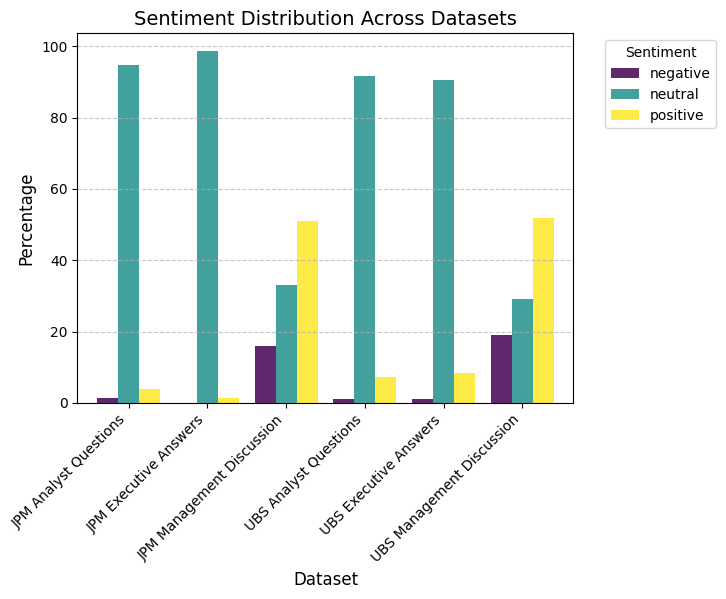

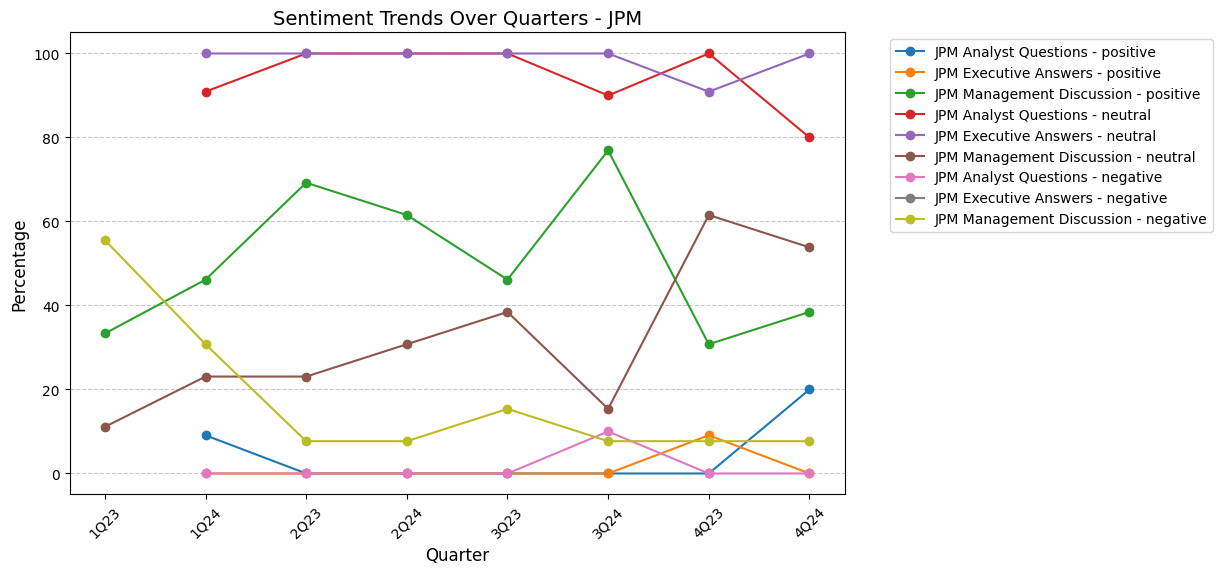

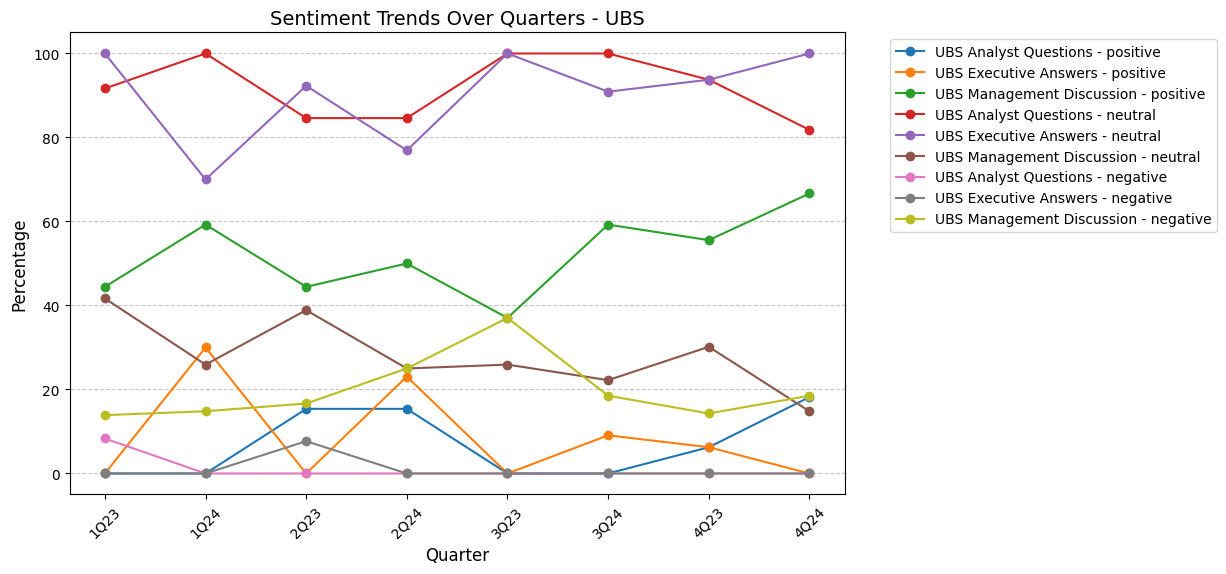


 Sample of Weakly Labeled Test Data:
                                                Text                Dataset  \
0  lot jeremy jeremy great see progress investmen...  JPM Analyst Questions   
1  hey jamie think seen comment government year t...  JPM Analyst Questions   
2  simple difficult guess jamie whos successor se...  JPM Analyst Questions   
3  jeremy first question you sort maybe -asking q...  JPM Analyst Questions   
4  you commentary kens questions great clear inve...  JPM Analyst Questions   

  Weak_Supervision_Label  
0               positive  
1                neutral  
2               positive  
3                neutral  
4               positive  


Device set to use cuda:0



 Sample of Test Data with FinBERT Predictions:
                                                Text                Dataset  \
0  lot jeremy jeremy great see progress investmen...  JPM Analyst Questions   
1  hey jamie think seen comment government year t...  JPM Analyst Questions   
2  simple difficult guess jamie whos successor se...  JPM Analyst Questions   
3  jeremy first question you sort maybe -asking q...  JPM Analyst Questions   
4  you commentary kens questions great clear inve...  JPM Analyst Questions   

  Weak_Supervision_Label FinBERT_Sentiment  
0               positive           neutral  
1                neutral           neutral  
2               positive           neutral  
3                neutral           neutral  
4               positive           neutral  


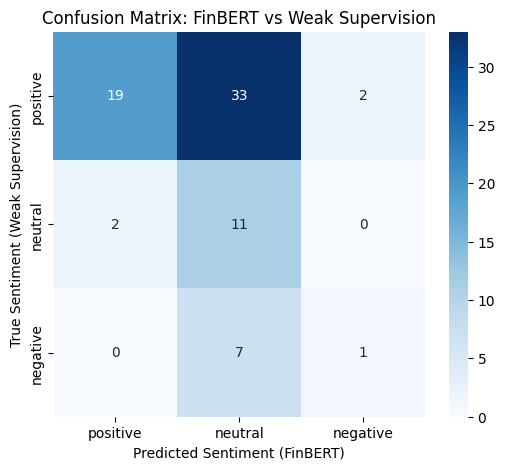


 Classification Report (FinBERT vs Weak Supervision):
              precision    recall  f1-score   support

    positive       0.33      0.12      0.18         8
     neutral       0.22      0.85      0.34        13
    negative       0.90      0.35      0.51        54

    accuracy                           0.41        75
   macro avg       0.48      0.44      0.34        75
weighted avg       0.72      0.41      0.44        75



OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive/BOE/bank_of_england/data/model_outputs/bertopic_finbert_output'

OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive/BOE/bank_of_england/data/model_outputs/bertopic_finbert_output'

In [ ]:
%run kk_mvp_modelling_V2.ipynb

## 2.2 Topic Clustering with GPT-4

## 2.3 Sentiment

### Sentiment Modelling with Flan T5

<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/modelling/ob_flan_t5_sentiment_jpm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run ob_flan_t5_sentiment_jpm.ipynb

Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/bank_of_england/data/model_outputs/Topic_Modelling_am/tqc_JPMorgan_answer_topic.csv'

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/bank_of_england/data/model_outputs/Topic_Modelling_am/tqc_JPMorgan_answer_topic.csv'

## 2.4 Summarization

### Summarisation with Flan-T5

<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/modelling/rb_jomorgan_summarisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run rb_jomorgan_summarisation_v4.ipynb

Exception: File `'rb_jomorgan_summarisation_v4.ipynb.py'` not found.